DATA SOURCE: KAGGLE
DATA COLLECTION: FROM VARIOUS WALMART STORES INTO A DATASET

DATA CLEANING & PROCESSING

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('Walmart.csv')

# Display basic information about the dataset
print("Basic Information about the dataset:")
print(df.info())

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

# Display summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(df.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Data Cleaning Steps

# Handling missing values (imputation or removal)
# Since there are no missing values in this dataset, this step is not required.

# Removing duplicates
df = df.drop_duplicates()

# Standardizing column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Converting data types
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Normalizing numerical features
scaler = MinMaxScaler()
numerical_features = ['weekly_sales', 'temperature', 'fuel_price', 'cpi', 'unemployment']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Encoding categorical features
# In this dataset, 'holiday_flag' is already numerical. No other categorical variables are present.

# Display cleaned and preprocessed data
print("\nCleaned and Preprocessed Data:")
print(df.head())

# Save the cleaned and preprocessed dataset to a new CSV file
df.to_csv('Walmart_cleaned_preprocessed.csv', index=False)

print("Data cleaning and preprocessing steps completed and cleaned dataset saved as 'Walmart_cleaned_preprocessed1.csv'.")

Basic Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None

First few rows of the dataset:
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-20

DATA TRANSFORMATION AND FEATURE ENGINEERING

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Walmart.csv')

# Display basic information about the dataset
print("Basic Information about the dataset:")
print(df.info())

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

# Display summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(df.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Data Cleaning Steps

# Handling missing values (imputation or removal)
# Since there are no missing values in this dataset, this step is not required.

# Removing duplicates
df = df.drop_duplicates()

# Standardizing column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Converting data types
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Data Transformation and Feature Engineering

# Create new features: Year, Month, Week
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week

# Create a new feature: Sales per Unit (assuming a unit price of $10 for simplicity)
df['sales_per_unit'] = df['weekly_sales'] / 10

# Create a new feature: Profit Margins (assuming a profit margin of 20% for simplicity)
df['profit_margin'] = df['weekly_sales'] * 0.20

# Aggregating weekly sales by store and year
aggregated_sales = df.groupby(['store', 'year'])['weekly_sales'].sum().reset_index()

# Calculate average sales during holidays vs. non-holidays
holiday_sales = df[df['holiday_flag'] == 1]['weekly_sales'].mean()
non_holiday_sales = df[df['holiday_flag'] == 0]['weekly_sales'].mean()

# Analyze the impact of temperature on weekly sales
temperature_sales_corr = df['temperature'].corr(df['weekly_sales'])

# Analyze the impact of fuel price on weekly sales
fuel_price_sales_corr = df['fuel_price'].corr(df['weekly_sales'])

# Analyze the impact of CPI on weekly sales
cpi_sales_corr = df['cpi'].corr(df['weekly_sales'])

# Analyze the impact of unemployment on weekly sales
unemployment_sales_corr = df['unemployment'].corr(df['weekly_sales'])

# Display the transformed data and new features
print("\nTransformed Data with New Features:")
print(df.head())

# Display aggregated sales data
print("\nAggregated Sales by Store and Year:")
print(aggregated_sales.head())

# Display correlation analysis results
print(f"\nAverage weekly sales on holidays: {holiday_sales}")
print(f"Average weekly sales on non-holidays: {non_holiday_sales}")
print(f"\nCorrelation between temperature and weekly sales: {temperature_sales_corr}")
print(f"Correlation between fuel price and weekly sales: {fuel_price_sales_corr}")
print(f"Correlation between CPI and weekly sales: {cpi_sales_corr}")
print(f"Correlation between unemployment and weekly sales: {unemployment_sales_corr}")

# Save the transformed dataset to a new CSV file
df.to_csv('Walmart_transformed.csv', index=False)

print("Data transformations and feature engineering completed and transformed dataset saved as 'Walmart_transformed1.csv'.")

Basic Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None

First few rows of the dataset:
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-20

DATA INTEGRITY & COMBINATION:
This dataset is collectecd by walmart and is already merged and combined

DATA QUALITY ASSESSMENT

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Walmart.csv')

# Display basic information about the dataset
print("Basic Information about the dataset:")
print(df.info())

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

# Display summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(df.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Identify outliers using the IQR method
# Convert numerical columns to numeric type to avoid TypeError
df['Weekly_Sales'] = pd.to_numeric(df['Weekly_Sales'], errors='coerce')
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df['Fuel_Price'] = pd.to_numeric(df['Fuel_Price'], errors='coerce')
df['CPI'] = pd.to_numeric(df['CPI'], errors='coerce')
df['Unemployment'] = pd.to_numeric(df['Unemployment'], errors='coerce')

# Drop rows with NaN values created by coercion
df = df.dropna()

# Select only numerical columns for quantile calculation
numerical_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers in the dataset:")
print(outliers)

# Ensure consistency and accuracy
# Check for unique values in categorical columns
unique_stores = df['Store'].nunique()
unique_dates = df['Date'].nunique()
unique_holiday_flags = df['Holiday_Flag'].unique()

print(f"\nNumber of unique stores: {unique_stores}")
print(f"Number of unique dates: {unique_dates}")
print(f"Unique values in Holiday_Flag: {unique_holiday_flags}")

# Addressing potential biases and ethical considerations
# Check for any biases in the data distribution
store_sales_distribution = df.groupby('Store')['Weekly_Sales'].sum()
holiday_sales_distribution = df.groupby('Holiday_Flag')['Weekly_Sales'].sum()

print("\nStore sales distribution:")
print(store_sales_distribution)

print("\nHoliday sales distribution:")
print(holiday_sales_distribution)

# Save the data quality assessment results to a new CSV file
data_quality_results = {
    'Missing Values': df.isnull().sum(),
    'Outliers': outliers,
    'Unique Stores': unique_stores,
    'Unique Dates': unique_dates,
    'Unique Holiday Flags': unique_holiday_flags,
    'Store Sales Distribution': store_sales_distribution,
    'Holiday Sales Distribution': holiday_sales_distribution
}

# Convert the dictionary to a DataFrame
data_quality_df = pd.DataFrame(list(data_quality_results.items()), columns=['Metric', 'Value'])
data_quality_df.to_csv('Walmart_data_quality_assessment.csv', index=False)

print("Data quality assessment completed and results saved as 'Walmart_data_quality_assessment.csv'.")

Basic Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None

First few rows of the dataset:
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-20

EXPLORATORY DATA ANALYSIS

This will include summary statistics, correlation analysis, the impact of holidays on weekly sales, and analyzing relationships between variables.

Basic Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None

First few rows of the dataset:
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-20

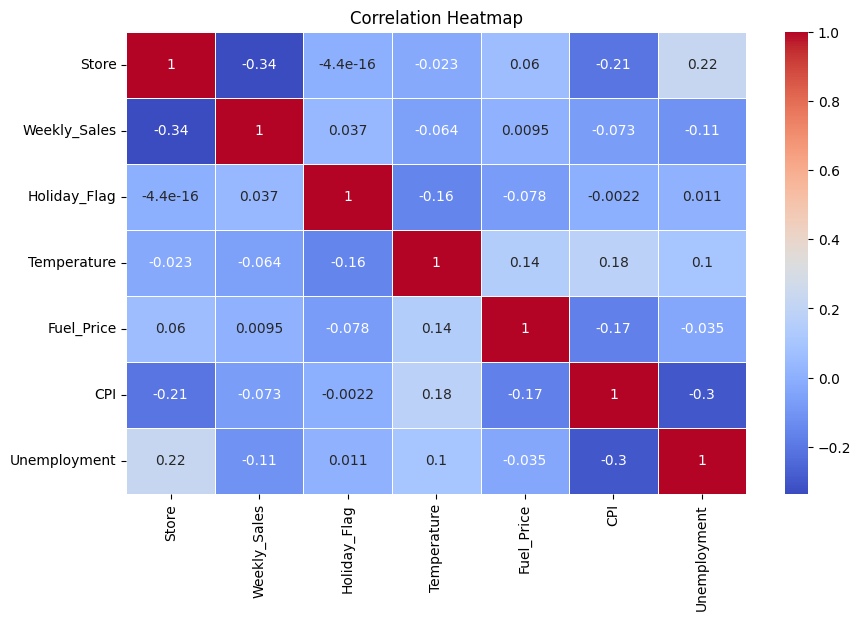


Average weekly sales on holidays: 1122887.8923555557
Average weekly sales on non-holidays: 1041256.3802088555


C:\Users\HP ENVY\AppData\Local\Temp\ipykernel_24448\2110484475.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Non-Holiday', 'Holiday'], y=[non_holiday_sales, holiday_sales], palette='viridis')


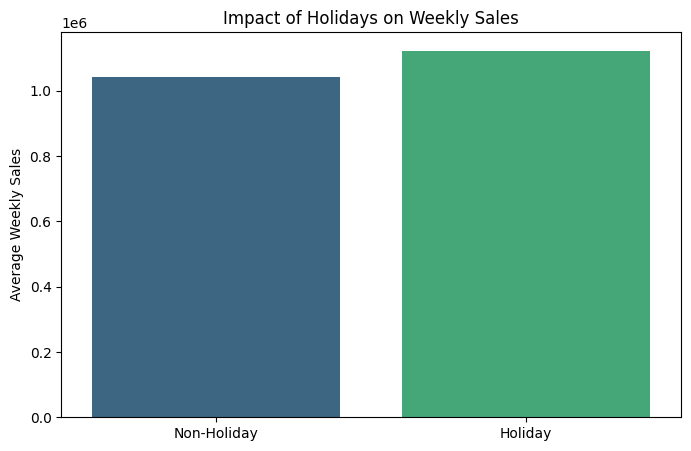

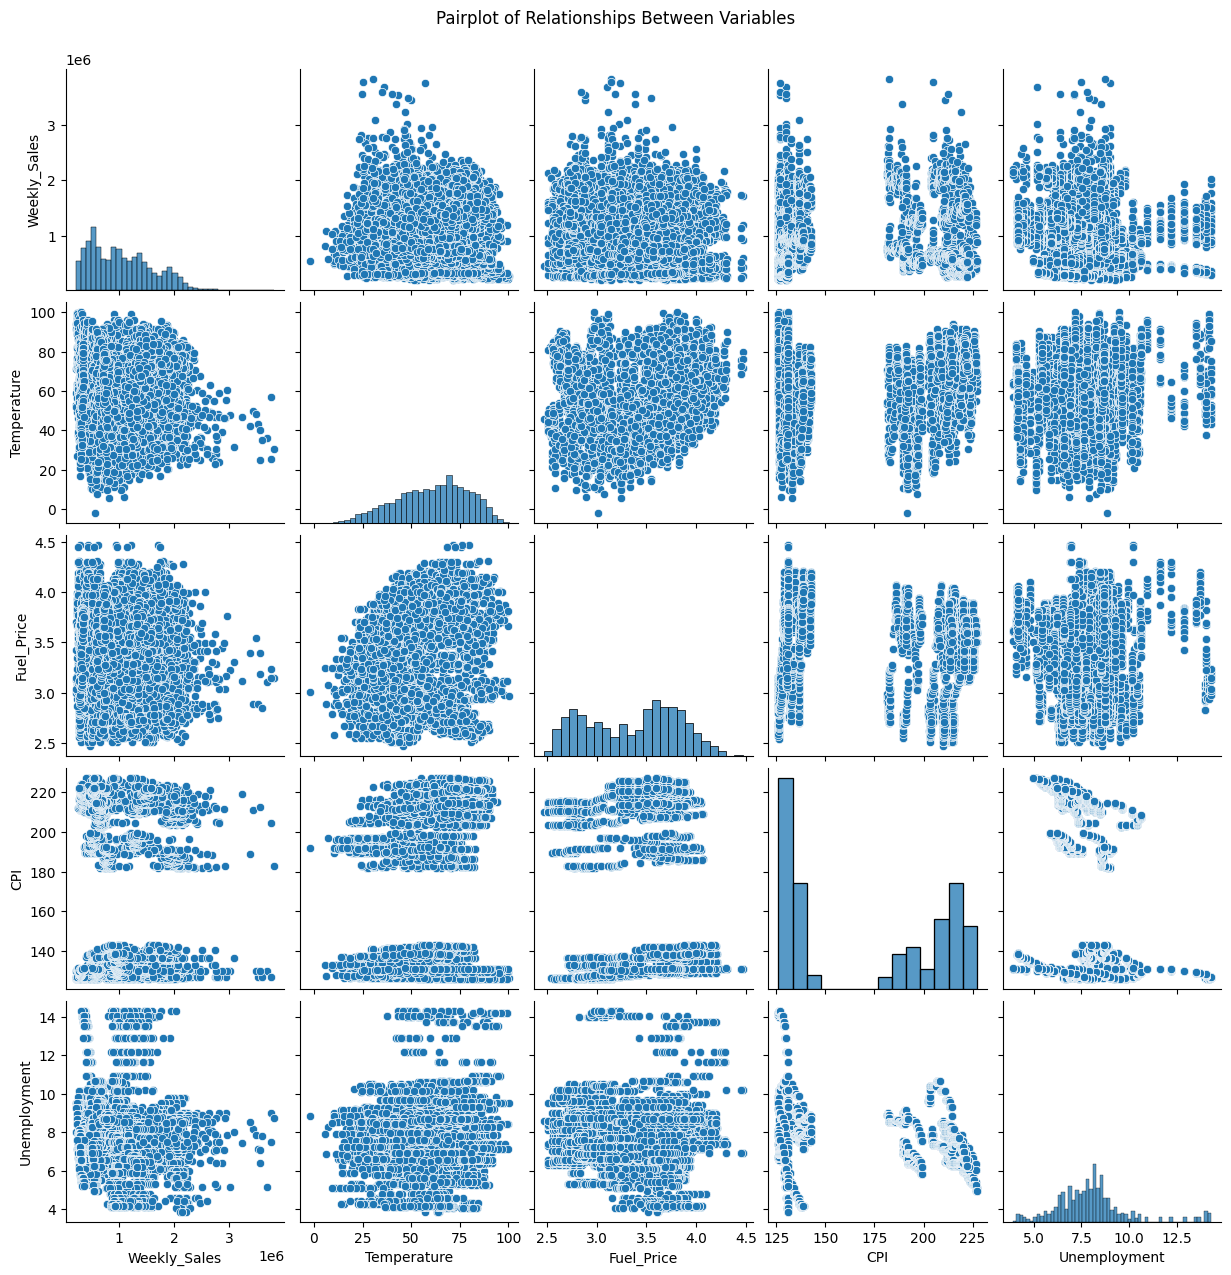

Exploratory Data Analysis (EDA) completed and results saved as 'Walmart_summary_statistics.csv', 'Walmart_correlation_matrix.csv', and 'Walmart_EDA_results.csv'.


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Walmart.csv')

# Display basic information about the dataset
print("Basic Information about the dataset:")
print(df.info())

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

# Display summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(df.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Exclude the 'Date' column from the correlation analysis
df_numeric = df.drop(columns=['Date'])

# Correlation analysis
correlation_matrix = df_numeric.corr()
print("\nCorrelation matrix:")
print(correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Impact of holidays on weekly sales
holiday_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].mean()
non_holiday_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()
print(f"\nAverage weekly sales on holidays: {holiday_sales}")
print(f"Average weekly sales on non-holidays: {non_holiday_sales}")

# Plot impact of holidays on weekly sales
plt.figure(figsize=(8, 5))
sns.barplot(x=['Non-Holiday', 'Holiday'], y=[non_holiday_sales, holiday_sales], palette='viridis')
plt.title('Impact of Holidays on Weekly Sales')
plt.ylabel('Average Weekly Sales')
plt.show()

# Analyze relationships between variables
sns.pairplot(df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.suptitle('Pairplot of Relationships Between Variables', y=1.02)
plt.show()

# Save the EDA results to separate CSV files
summary_statistics = df.describe()
summary_statistics.to_csv('Walmart_summary_statistics.csv')

correlation_matrix.to_csv('Walmart_correlation_matrix.csv')

eda_results = {
    'Average Weekly Sales on Holidays': holiday_sales,
    'Average Weekly Sales on Non-Holidays': non_holiday_sales
}

eda_df = pd.DataFrame(list(eda_results.items()), columns=['Metric', 'Value'])
eda_df.to_csv('Walmart_EDA_results.csv', index=False)

print("Exploratory Data Analysis (EDA) completed and results saved as 'Walmart_summary_statistics.csv', 'Walmart_correlation_matrix.csv', and 'Walmart_EDA_results.csv'.")